# Twitter Automation Scanner - Dependencies Graph

## Step 1 - Install required dependencies

- [networkx](https://networkx.org) - NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
- [matplotlib](https://matplotlib.org) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In [1]:
pip install networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2 - Load source JSON file

In [2]:
import json
import os

folder_walk = os.walk('sourcedata/dbdump')
first_file_in_folder = next(folder_walk)[2][0]

report_file = open(f'{ os.getcwd() }/sourcedata/dbdump/{first_file_in_folder}')
user_data = json.load(report_file)

users = []

for user in user_data:
    users.append((user['_id'],{'followers': user['followers'], 'following': user['following'], 'id': user['_id']}))

## Step 3 - Draw dependencies graph

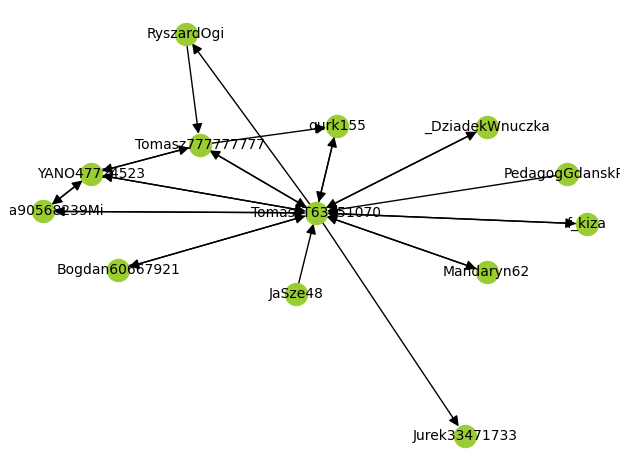

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

usernames = list()

# Get a list of usernames
for user in users:
    usernames.append(user[0])

# Fill in graph
for user in users:
    username = user[0]
    
    for follower in user[1]['followers']:
        if follower in usernames:
            G.add_edge(follower, username)
    for follower in user[1]['following']:
        if follower in usernames:
            G.add_edge(username, follower)         
            
pos = nx.spring_layout(G)

# node_sizes = list()

# for node in G.nodes():
#     node_sizes.append(G.number_of_edges(node)*1000)
    
# print(node_sizes)
    
# nodes
nx.draw_networkx_nodes(G, pos, node_size=250, node_color="yellowgreen")

# edges
nx.draw_networkx_edges(G, pos, width=1, arrowstyle="-|>", arrowsize=15, node_size=250, arrows=True)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10)

ax = plt.gca()
ax.margins(0.01)

plt.axis("off")
plt.tight_layout()
plt.show()